# **COMPUTER PRICE RANGE ESTIMATOR**

This projects aims to estimate the price of a computer within the range 0-3, 0 being the cheapest and 3 being the most expensive. Using a Sequential model, I added Dropout and Dense layers to create the CNN, and outputted the results of training the model and the predictions of the model on the test data.

In [3]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

In [4]:
data = read_csv('train.csv')

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# splitting the data

x = data.iloc[:,:20].values
y = data.iloc[:,20:21].values

In [7]:
from sklearn.preprocessing import StandardScaler

# normalizes dataset with StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
from sklearn.preprocessing import OneHotEncoder

# OHE transforms y into an array

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [9]:
y[:,:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [10]:
# do not need massive test size bc the dataset is already very large

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1800, 20) (200, 20) (1800, 4) (200, 4)


In [51]:
# building the neural network

model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2)) # adding dropout layer to reduce overfitting
model.add(Dense(4, activation = 'softmax'))

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 15)                315       
                                                                 
 dense_10 (Dense)            (None, 12)                192       
                                                                 
 dropout_3 (Dropout)         (None, 12)                0         
                                                                 
 dense_11 (Dense)            (None, 4)                 52        
                                                                 
Total params: 559
Trainable params: 559
Non-trainable params: 0
_________________________________________________________________


In [53]:
import tensorflow as tf

# use categorical crossentropy to specify how to train model
# must use OHE for categorical crossentropy
# method to change learning rate

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size=32)

Epoch 1/50
57/57 [==============================] - 2s 8ms/step - loss: 1.5132 - accuracy: 0.2306 - val_loss: 1.4515 - val_accuracy: 0.2900
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 1.4120 - accuracy: 0.2706 - val_loss: 1.4101 - val_accuracy: 0.2950
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3880 - accuracy: 0.2867 - val_loss: 1.3804 - val_accuracy: 0.3300
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3500 - accuracy: 0.3322 - val_loss: 1.3461 - val_accuracy: 0.3900
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3144 - accuracy: 0.3644 - val_loss: 1.2928 - val_accuracy: 0.4050
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 1.2430 - accuracy: 0.4283 - val_loss: 1.1993 - val_accuracy: 0.4750
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 1.1316 - accuracy: 0.5072 - val_loss: 1.0665 - val_accuracy: 0.5500
Epoch 8/50
57/57 [==

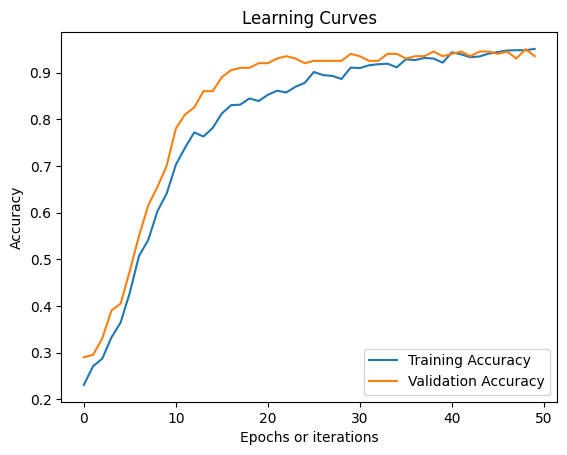

In [54]:
import matplotlib.pyplot as plt

plt.title('Learning Curves')
plt.xlabel('Epochs or iterations')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

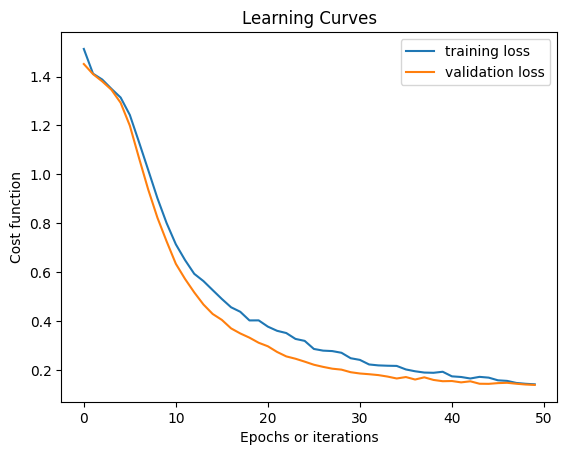

In [55]:
plt.title('Learning Curves')
plt.xlabel('Epochs or iterations')
plt.ylabel('Cost function')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [56]:
loss, acc = model.evaluate(x_test, y_test)
print('Test Accuracy: %.3f' %(acc))
print()

for i in range(len(x_test)):
  temp = np.array(x_test[i,:])
  temp = np.expand_dims(temp, 0)
  a = list(model.predict(temp))
  ans = ()
  for n in a:
    ans = n
  print('Predicted probabilities for input:', ans)
  print('Actual price range: ', end = '')
  for t in range(len(y[i])):
    if y[i,t] == 1:
      print('%d is the estimated price in range 0-3' %(t))
  print()

7/7 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9350
Test Accuracy: 0.935

1/1 [==============================] - 0s 69ms/step
Predicted probabilities for input: [5.7277591e-03 9.9290788e-01 1.3644218e-03 3.9265595e-09]
Actual price range: 1 is the estimated price in range 0-3

1/1 [==============================] - 0s 24ms/step
Predicted probabilities for input: [9.6656835e-01 3.3431612e-02 1.4436696e-08 6.8465218e-16]
Actual price range: 2 is the estimated price in range 0-3

1/1 [==============================] - 0s 22ms/step
Predicted probabilities for input: [9.9500269e-01 4.9972930e-03 2.4504499e-11 9.0029116e-20]
Actual price range: 2 is the estimated price in range 0-3

1/1 [==============================] - 0s 25ms/step
Predicted probabilities for input: [9.9265516e-01 7.3448461e-03 1.7626114e-09 1.1738168e-16]
Actual price range: 2 is the estimated price in range 0-3

1/1 [==============================] - 0s 24ms/step
Predicted probabilities f